<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise_3_2_Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [1]:
from sklearn.datasets import load_diabetes

In [3]:
# 1. Load & peek
bunch = load_diabetes(as_frame=True)
df = bunch.frame
print(df.head())
print(df.dtypes)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


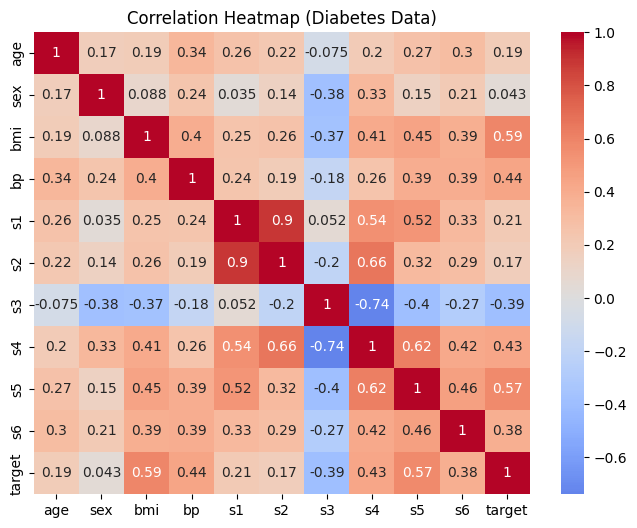

In [4]:
# 2. Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation Heatmap (Diabetes Data)")
plt.show()

In [5]:
# Find top 2 correlated features with target
abs_corr = corr["target"].abs().sort_values(ascending=False)
top2 = abs_corr.index[1:3]
print("Top 2 features with target:", top2.tolist())

Top 2 features with target: ['bmi', 's5']


In [6]:
# 3. OLS for each
for feature in top2:
    X = sm.add_constant(df[feature])
    y = df["target"]
    model = sm.OLS(y, X).fit()
    print(f"\n=== target ~ {feature} ===")
    print(model.summary().tables[1])


=== target ~ bmi ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301

=== target ~ s5 ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      3.027     50.263      0.000     146.185     158.082
s5           916.1374     63.634     14.397      0.000     791.072    1041.202


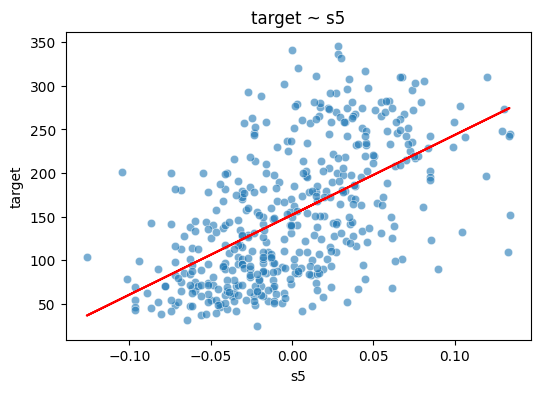

In [9]:
# Scatter + fitted line
plt.figure(figsize=(6,4))
sns.scatterplot(x=df[feature], y=df["target"], alpha=0.6)
plt.plot(df[feature], model.predict(X), color="red")
plt.title(f"target ~ {feature}")
plt.xlabel(feature)
plt.ylabel("target")
plt.show()